In [1]:
# pip install pandas

In [2]:
# pip install matplotlib

In [3]:
# pip install seaborn

In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import  OneHotEncoder

trainD = pd.read_csv('train.csv')
testD = pd.read_csv('test.csv')
actual_price = pd.read_csv('sample_submission.csv')

In [39]:
data_train = trainD
select = ['MSSubClass','LotConfig','OverallQual','GrLivArea','TotalBsmtSF','BsmtFinSF1','2ndFlrSF','GarageArea','1stFlrSF','YearBuilt']
data_train = data_train[select]
data_train

,MSSubClass,LotConfig,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt
0,60,Inside,7,1710,856,706,854,548,856,2003
1,20,FR2,6,1262,1262,978,0,460,1262,1976
2,60,Inside,7,1786,920,486,866,608,920,2001
3,70,Corner,7,1717,756,216,756,642,961,1915
4,60,FR2,8,2198,1145,655,1053,836,1145,2000
...,...,...,...,...,...,...,...,...,...,...
1455,60,Inside,6,1647,953,0,694,460,953,1999
1456,20,Inside,6,2073,1542,790,0,500,2073,1978
1457,70,Inside,7,2340,1152,275,1152,252,1188,1941
1458,20,Inside,5,1078,1078,49,0,240,1078,1950


In [40]:
one_hot_encoded_data = pd.get_dummies(data_train, columns = ['LotConfig'])
X_train=one_hot_encoded_data

In [8]:
X_train

,MSSubClass,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,7,1710,856,706,854,548,856,2003,0,0,0,0,1
1,20,6,1262,1262,978,0,460,1262,1976,0,0,1,0,0
2,60,7,1786,920,486,866,608,920,2001,0,0,0,0,1
3,70,7,1717,756,216,756,642,961,1915,1,0,0,0,0
4,60,8,2198,1145,655,1053,836,1145,2000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,1647,953,0,694,460,953,1999,0,0,0,0,1
1456,20,6,2073,1542,790,0,500,2073,1978,0,0,0,0,1
1457,70,7,2340,1152,275,1152,252,1188,1941,0,0,0,0,1
1458,20,5,1078,1078,49,0,240,1078,1950,0,0,0,0,1


In [9]:
Y_train = trainD['SalePrice']

In [10]:
Y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [11]:
# make sure do not have nullvalue
X_train.isnull().sum() 

MSSubClass           0
OverallQual          0
GrLivArea            0
TotalBsmtSF          0
BsmtFinSF1           0
2ndFlrSF             0
GarageArea           0
1stFlrSF             0
YearBuilt            0
LotConfig_Corner     0
LotConfig_CulDSac    0
LotConfig_FR2        0
LotConfig_FR3        0
LotConfig_Inside     0
dtype: int64

In [12]:
Y_train.isnull().sum() 

0

In [13]:
# preprocesing for the test data

In [14]:
data_test = testD[select]
data_test

,MSSubClass,LotConfig,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt
0,20,Inside,5,896,882.0,468.0,0,730.0,896,1961
1,20,Corner,6,1329,1329.0,923.0,0,312.0,1329,1958
2,60,Inside,5,1629,928.0,791.0,701,482.0,928,1997
3,60,Inside,6,1604,926.0,602.0,678,470.0,926,1998
4,120,Inside,8,1280,1280.0,263.0,0,506.0,1280,1992
...,...,...,...,...,...,...,...,...,...,...
1454,160,Inside,4,1092,546.0,0.0,546,0.0,546,1970
1455,160,Inside,4,1092,546.0,252.0,546,286.0,546,1970
1456,20,Inside,5,1224,1224.0,1224.0,0,576.0,1224,1960
1457,85,Inside,5,970,912.0,337.0,0,0.0,970,1992


In [15]:
X_test = pd.get_dummies(data_test, columns = ['LotConfig'])
X_test

,MSSubClass,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,20,5,896,882.0,468.0,0,730.0,896,1961,0,0,0,0,1
1,20,6,1329,1329.0,923.0,0,312.0,1329,1958,1,0,0,0,0
2,60,5,1629,928.0,791.0,701,482.0,928,1997,0,0,0,0,1
3,60,6,1604,926.0,602.0,678,470.0,926,1998,0,0,0,0,1
4,120,8,1280,1280.0,263.0,0,506.0,1280,1992,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,1092,546.0,0.0,546,0.0,546,1970,0,0,0,0,1
1455,160,4,1092,546.0,252.0,546,286.0,546,1970,0,0,0,0,1
1456,20,5,1224,1224.0,1224.0,0,576.0,1224,1960,0,0,0,0,1
1457,85,5,970,912.0,337.0,0,0.0,970,1992,0,0,0,0,1


In [16]:
X_test.isnull().sum() 

MSSubClass           0
OverallQual          0
GrLivArea            0
TotalBsmtSF          1
BsmtFinSF1           1
2ndFlrSF             0
GarageArea           1
1stFlrSF             0
YearBuilt            0
LotConfig_Corner     0
LotConfig_CulDSac    0
LotConfig_FR2        0
LotConfig_FR3        0
LotConfig_Inside     0
dtype: int64

In [17]:
X_test= X_test.fillna(0)
X_test

,MSSubClass,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF,GarageArea,1stFlrSF,YearBuilt,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,20,5,896,882.0,468.0,0,730.0,896,1961,0,0,0,0,1
1,20,6,1329,1329.0,923.0,0,312.0,1329,1958,1,0,0,0,0
2,60,5,1629,928.0,791.0,701,482.0,928,1997,0,0,0,0,1
3,60,6,1604,926.0,602.0,678,470.0,926,1998,0,0,0,0,1
4,120,8,1280,1280.0,263.0,0,506.0,1280,1992,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,1092,546.0,0.0,546,0.0,546,1970,0,0,0,0,1
1455,160,4,1092,546.0,252.0,546,286.0,546,1970,0,0,0,0,1
1456,20,5,1224,1224.0,1224.0,0,576.0,1224,1960,0,0,0,0,1
1457,85,5,970,912.0,337.0,0,0.0,970,1992,0,0,0,0,1


In [18]:
X_test.isnull().sum() 

MSSubClass           0
OverallQual          0
GrLivArea            0
TotalBsmtSF          0
BsmtFinSF1           0
2ndFlrSF             0
GarageArea           0
1stFlrSF             0
YearBuilt            0
LotConfig_Corner     0
LotConfig_CulDSac    0
LotConfig_FR2        0
LotConfig_FR3        0
LotConfig_Inside     0
dtype: int64

In [19]:
Y_test = actual_price['SalePrice']
Y_test.isnull().sum() 

0

In [20]:
### Mutiple LinearRegression class

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [49]:


class multivariate_linear_reg:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        
        
        self.x_test = x_test
        self.y_test = y_test
        
        y_test_predict = self.predict()
        
        self.plot(y_test, y_test_predict)
        self.error(y_test_predict)
        print()
        
    def predict(self):
        # apply the model
        lr_method = LinearRegression()
        lr_method.fit(self.x_train, self.y_train)
        
        
        # get the predict result
        y_test_predict = lr_method.predict(self.x_test)
        
        return y_test_predict
    
    def plot(self,y_test, y_test_predict):
     
        test_dates = self.x_test.index     
        
        plt.figure(figsize=(500, 500))
        
        plt.suptitle('Mutiple Linear Regression')
        #plt.plot(test_dates,y_test_predict)
        
        #fig = plt.subplots()
        ax1 = plt.subplots()

        color = 'tab:red'
        #ax1.set_xlabel('test data')
        #ax1.set_ylabel('y_predict', color=color)
        plt.plot(test_dates,y_test_predict, color=color)
        plt.tick_params(axis='y', labelcolor=color)

        ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        #ax2.set_ylabel('actual value', color=color)  # we already handled the x-label with ax1
        ax2.plot(test_dates,y_test, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        plt.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.show()
        
    def error(self,y_test_predict):
        # calculact the accuracy
        # the basic formula:  r2 = 1 – (SSres  /SSmean )
        score = r2_score(y_test_predict,self.y_test)
        print ('the r2 score is :', score)
        print('mean_sqrd_error is:',mean_squared_error(y_test_predict, self.y_test))
        print('root_mean_squared error of is:',np.sqrt(mean_squared_error(y_test_predict, self.y_test)))
        return score
        

<Figure size 36000x36000 with 0 Axes>

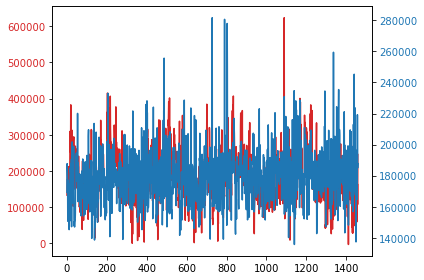

the r2 score is : 0.09914872237289296
mean_sqrd_error is: 4529658722.333944
root_mean_squared error of is: 67302.73933751839



In [50]:
#call Mutiple linear Regression 
multivariate_linear_reg(X_train,Y_train,X_test,Y_test)


In [ ]:
#print ('the r2 score is :', r2_score(Y_test,y_test_predict))
#print ('the mean s')